In [169]:
%matplotlib inline

In [170]:
import numpy as np
import pylab
import pandas
from scipy.spatial.distance import euclidean
from collections import OrderedDict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

import matplotlib as mpl
import matplotlib.pyplot as plt

SAMPLE_COUNT = 1000
DIMENSIONS = 1, 2, 4, 8, 16, 32

In [171]:
# Generate Samples
SAMPLES = OrderedDict()
for p in DIMENSIONS:
    SAMPLES[p] = [np.random.random(p) for i in xrange(SAMPLE_COUNT)]

In [172]:
# Calculate Y values
A_VAL = 0.5
Y_VALUES = OrderedDict()
for p in DIMENSIONS:
    Y_VALUES[p] = []
    zero_array = np.zeros(p, dtype=np.float)
    for i in xrange(SAMPLE_COUNT):
        e_dist = euclidean(SAMPLES[p][i], zero_array)
        y_val = np.exp((-A_VAL) * e_dist)
        Y_VALUES[p].append(y_val)
    
#     break
print min(Y_VALUES[1]), max(Y_VALUES[1])
print min(Y_VALUES[2]), max(Y_VALUES[2])
print min(Y_VALUES[4]), max(Y_VALUES[4])
print min(Y_VALUES[8]), max(Y_VALUES[8])
print min(Y_VALUES[16]), max(Y_VALUES[16])
print min(Y_VALUES[32]), max(Y_VALUES[32])

0.606680836654 0.99966411648
0.495562438737 0.966475115784
0.405331785207 0.872090822784
0.31522372143 0.685973741424
0.212535394675 0.510095324062
0.134389738097 0.300508605831


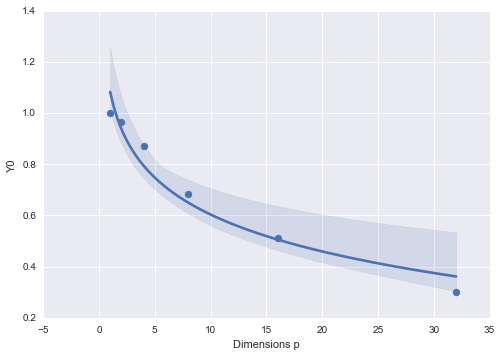

In [173]:
PREDICT_VALS = {}
for p in DIMENSIONS:
    nn = KNeighborsRegressor(n_neighbors=1,)
    nn.fit(SAMPLES[p], Y_VALUES[p])
    dir(nn)
    PREDICT_VALS[p] = nn.predict([np.zeros(p)])
ERRORS = {p:1-y for p,y in PREDICT_VALS.items()}
ERROR = ERRORS[1][0]
df= pandas.DataFrame([[k,v[0]] for k,v in PREDICT_VALS.items()], columns=["Dimensions p", "Y0"])
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="Dimensions p", y="Y0", data=df, x_estimator=np.mean, logx=True, truncate=True)

In [174]:
# dim_1 = 1
# count_1 = 10
# samples_1 = [np.random.random(dim_1) for i in xrange(count_1)]
# y_values_1 = []
# zero_array_1 = np.zeros(dim_1, dtype=np.float)
# for i in range(count_1):    
#     e_dist = euclidean(samples_1[i], zero_array_1)
#     y_val = np.exp((-A_VAL) * e_dist)
#     y_values_1.append(y_val)
# nn = KNeighborsRegressor(n_neighbors=1,)
# nn.fit(samples_1, y_values_1)
# predict_val_1 = nn.predict([np.zeros(dim_1)])
# err_1 = 1- predict_val_1
#print(dim_1, count_1, err_1)

NameError: name 'dim_1' is not defined

In [ ]:
from math import pow;
err = 1
err_std = 0.1
j=0
SIM = {}
increase = [1,2,4,100,1000,10000]
for p in 1,2,4,8,16,32:
    zero_array = np.zeros(p, dtype=np.float)
    sample_size = int(pow(5,p))
    #err = 1
    #while err > err_std:
        #sample_size+=increase[j]
    samples = [np.random.random(p) for i in xrange(sample_size)]
    y_values = []
    for i in xrange(sample_size):
        e_dist = euclidean(samples[i], zero_array)
        y_val = np.exp((-A_VAL) * e_dist)
        y_values.append(y_val)
    nn = KNeighborsRegressor(n_neighbors=1,)
    nn.fit(samples, y_values)
    predict_val = nn.predict([np.zeros(p)])
    err = 1- predict_val
    SIM[p] = sample_size
    print(p, sample_size, err)
    #j+=1
    print(p, sample_size, err)

(1, 5, array([ 0.03837018]))
(1, 5, array([ 0.03837018]))
(2, 25, array([ 0.10200912]))
(2, 25, array([ 0.10200912]))
(4, 625, array([ 0.07613208]))
(4, 625, array([ 0.07613208]))
(8, 390625, array([ 0.13318488]))
(8, 390625, array([ 0.13318488]))
